In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker

Leemos los Data Sets como un data frame de pandas

In [2]:
coursera_c = pd.read_csv(r'C:\Users\josgr\Desktop\PI03-Analytics\Coursera_courses.csv')
courses = coursera_c.copy()

In [3]:
coursera_r = pd.read_csv(r'C:\Users\josgr\Desktop\PI03-Analytics\Coursera_reviews.csv')
reviews = coursera_r.copy()

Visualizamos la estructura de cada data frame

In [4]:
courses.head(4)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals


In [5]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [6]:
reviews.head(4)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Unimos los data frame para trabajar de manera mas comoda

In [8]:
coursera_merged = pd.merge(courses, reviews, on='course_id')


In [9]:
coursera_merged.head(4)

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1


In [10]:
coursera_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   name          1454711 non-null  object
 1   institution   1454711 non-null  object
 2   course_url    1454711 non-null  object
 3   course_id     1454711 non-null  object
 4   reviews       1454558 non-null  object
 5   reviewers     1454711 non-null  object
 6   date_reviews  1454711 non-null  object
 7   rating        1454711 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 88.8+ MB


Consultamos los datos nulos o faltantes 

In [11]:
# Verificar los valores nulos en el DataFrame edx
missing_values = coursera_merged.isnull().sum()

# Mostrar los valores nulos por columna
print(missing_values)

name              0
institution       0
course_url        0
course_id         0
reviews         153
reviewers         0
date_reviews      0
rating            0
dtype: int64


In [12]:
# Reemplazar los valores faltantes en la columna 'reviews' por "N/A"
coursera_merged['reviews'] = coursera_merged['reviews'].fillna("N/A")

In [13]:
missing_values = coursera_merged.isnull().sum()
missing_values

name            0
institution     0
course_url      0
course_id       0
reviews         0
reviewers       0
date_reviews    0
rating          0
dtype: int64

In [14]:
print(coursera_merged.columns.to_series().to_string(index=False))

        name
 institution
  course_url
   course_id
     reviews
   reviewers
date_reviews
      rating


In [15]:
print(coursera_merged.iloc[0].to_string(index=False, header=False))

                                  Machine Learning
                               Stanford University
   https://www.coursera.org/learn/machine-learning
                                  machine-learning
This is an extremely basic course. Machine lear...
                                      By Deleted A
                                      Mar 18, 2017
                                                 1


## Clasificacion de las Variables del Data Frame

### Variables Cualitativas:

Dicotómicas: No hay variables dicotómicas en el DataFrame.

Polinómicas: name, institution, course_url, course_id, reviews, reviewers, date_reviews

### Variables Cuantitativas:

Discretas: No hay variables discretas en el DataFrame.

Continuas: rating

## Análisis Univariado 

Top 10 de Cursos más Comunes

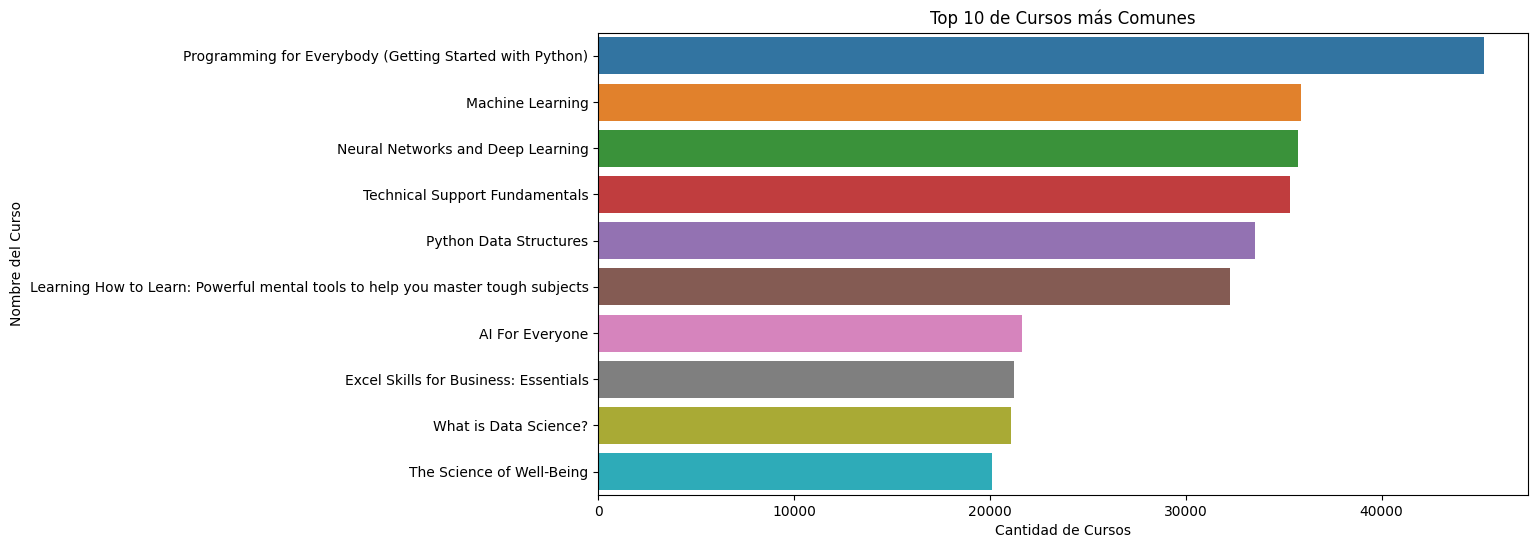

In [16]:
top_10_names = coursera_merged['name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_names.values, y=top_10_names.index, orient='h')
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Nombre del Curso')
plt.title('Top 10 de Cursos más Comunes')
plt.show()


Top 10 de Instituciones mas comunes

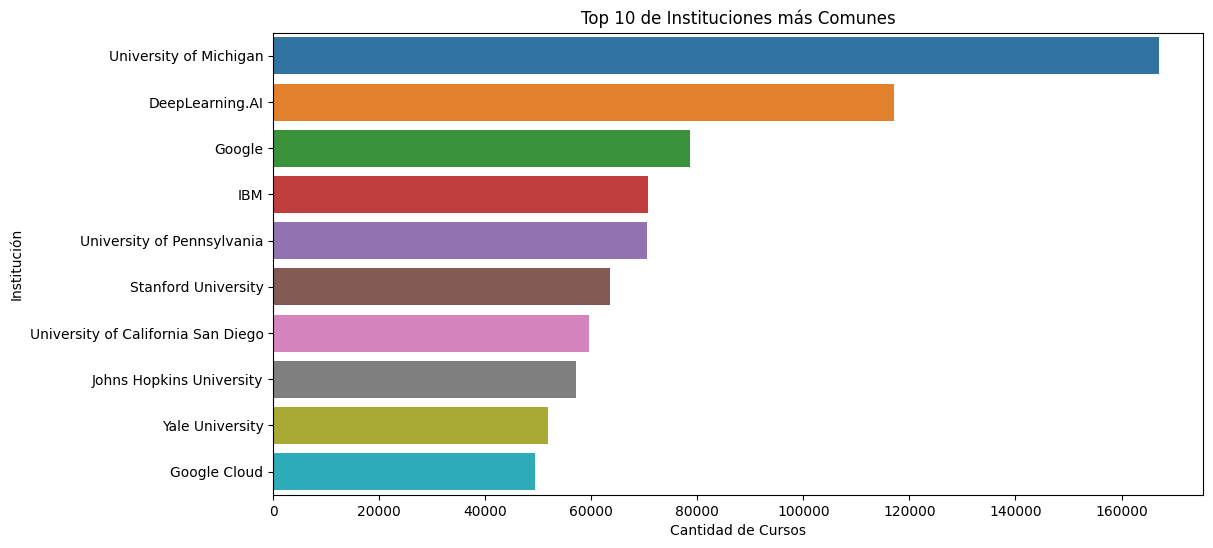

In [17]:
top_10_institutions = coursera_merged['institution'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_institutions.values, y=top_10_institutions.index, orient='h')
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Institución')
plt.title('Top 10 de Instituciones más Comunes')
plt.show()


Top 10 de Fechas de Reseñas más Comunes

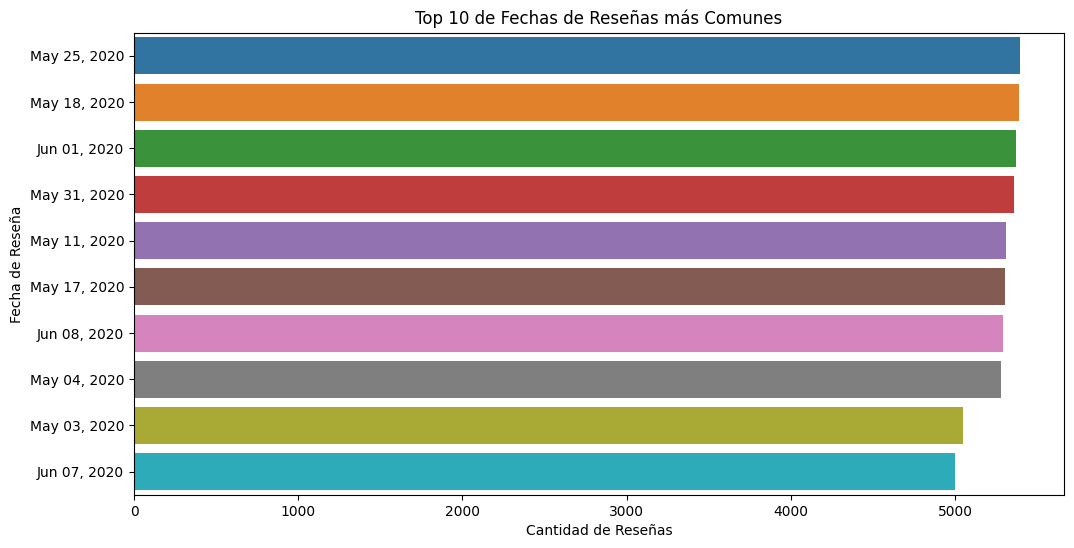

In [18]:
top_10_dates = coursera_merged['date_reviews'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dates.values, y=top_10_dates.index, orient='h')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Fecha de Reseña')
plt.title('Top 10 de Fechas de Reseñas más Comunes')
plt.show()


Distribución de Calificaciones

Text(0.5, 1.0, 'Distribución de Calificaciones')

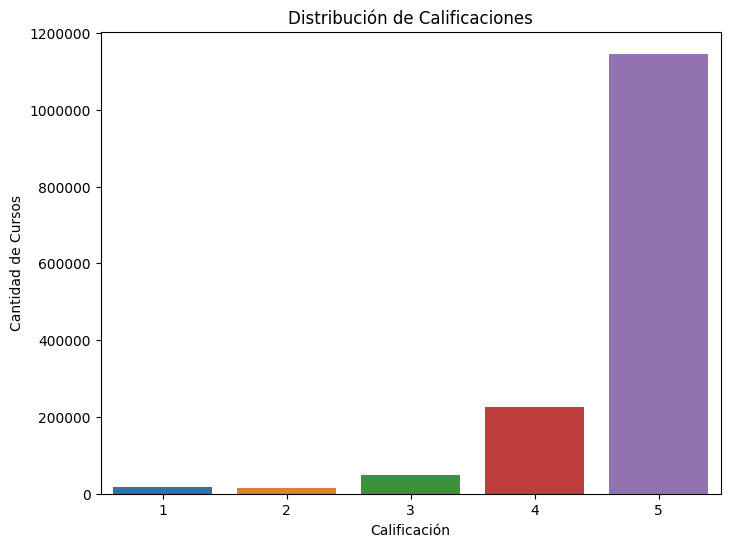

In [19]:
rating_counts = coursera_merged['rating'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)

# Formatear los valores del eje y
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xlabel('Calificación')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución de Calificaciones')


# Analisis Multivariado

Distribución de los cursos según la institución y la calificación.

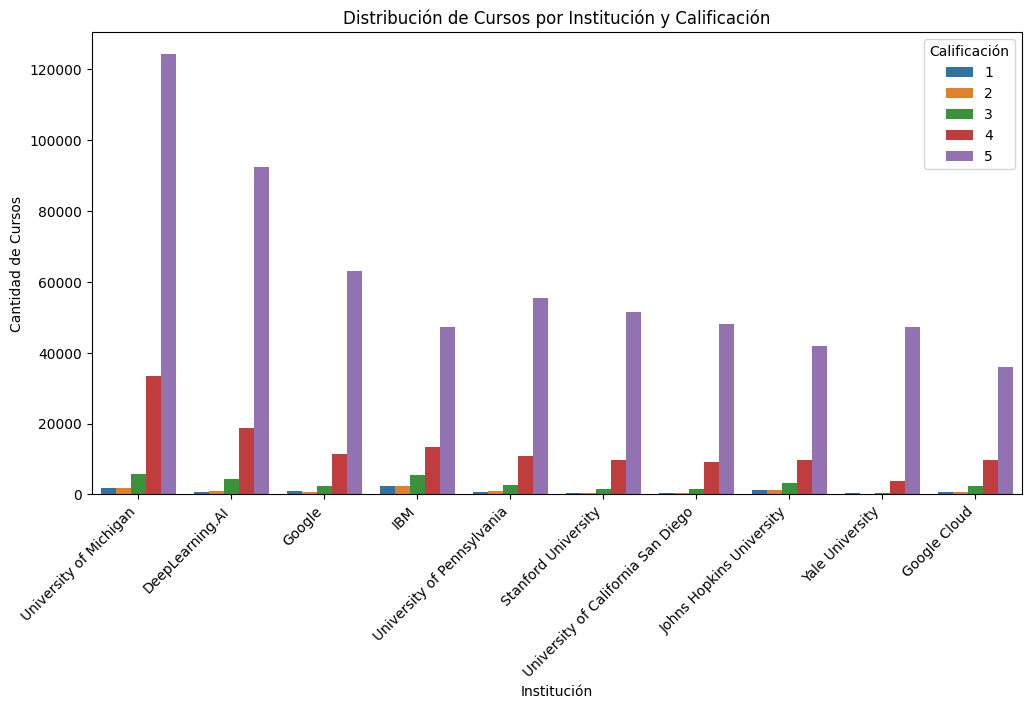

In [20]:
top_10_institutions = coursera_merged['institution'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.countplot(data=coursera_merged, x='institution', hue='rating', order=top_10_institutions.index)
plt.xlabel('Institución')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución de Cursos por Institución y Calificación')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Calificación')
plt.show()


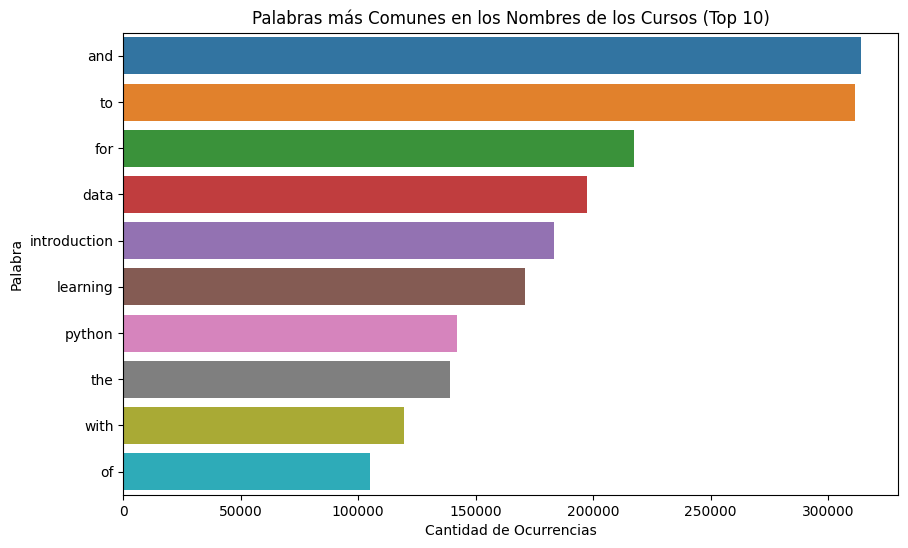

In [21]:
from collections import Counter

course_names = ' '.join(coursera_merged['name']).lower().split()
top_10_common_words = dict(Counter(course_names).most_common(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_10_common_words.values()), y=list(top_10_common_words.keys()))
plt.xlabel('Cantidad de Ocurrencias')
plt.ylabel('Palabra')
plt.title('Palabras más Comunes en los Nombres de los Cursos (Top 10)')
plt.show()


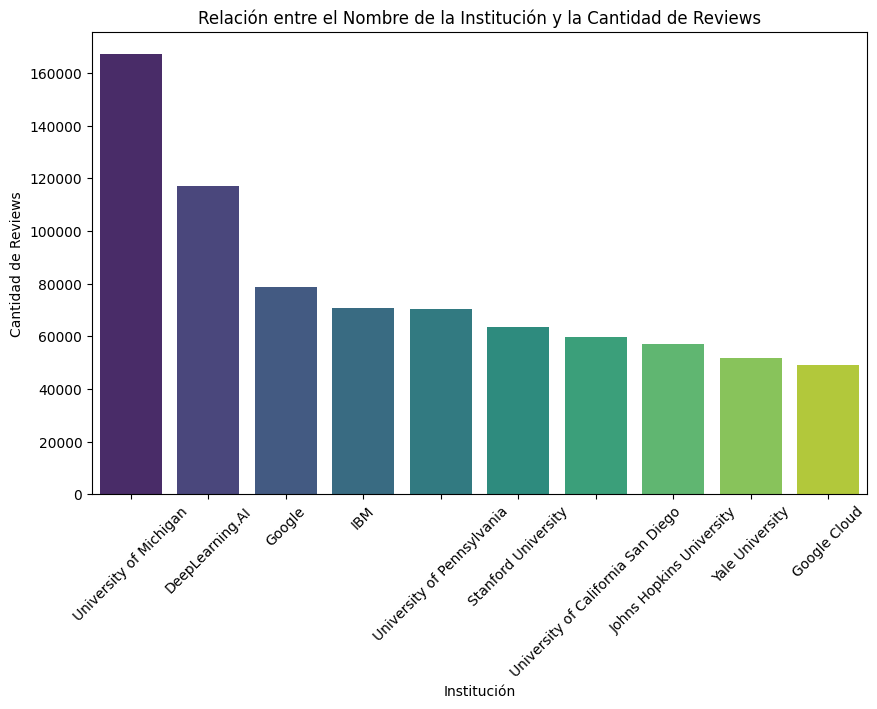

In [22]:
# Ejemplo 1: Relación entre el Nombre de la Institución y la Cantidad de Reviews
top_10_institutions = coursera_merged['institution'].value_counts().head(10).index
top_10_institutions_df = coursera_merged[coursera_merged['institution'].isin(top_10_institutions)]
plt.figure(figsize=(10, 6))
sns.countplot(x='institution', data=top_10_institutions_df, order=top_10_institutions_df['institution'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Institución')
plt.ylabel('Cantidad de Reviews')
plt.title('Relación entre el Nombre de la Institución y la Cantidad de Reviews')
plt.show()

Relación entre el Nombre de la Institución y el Promedio de Calificaciones (Top 10)

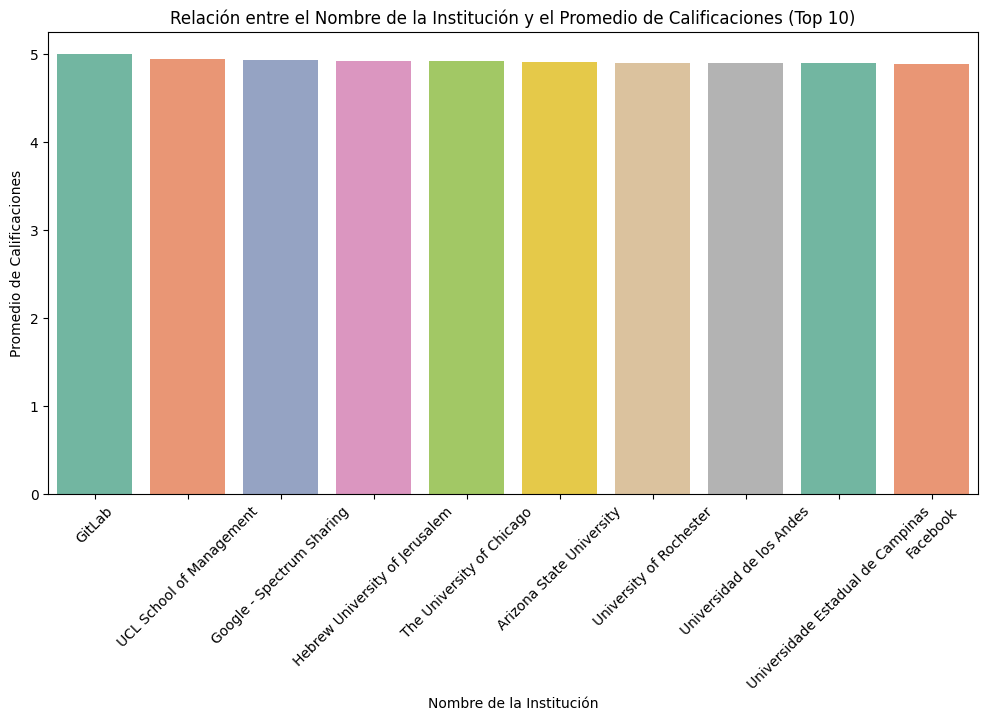

In [23]:
# Relación entre el Nombre de la Institución y el Promedio de Calificaciones
institution_avg_rating = coursera_merged.groupby('institution')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=institution_avg_rating.index, y=institution_avg_rating.values, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Nombre de la Institución')
plt.ylabel('Promedio de Calificaciones')
plt.title('Relación entre el Nombre de la Institución y el Promedio de Calificaciones (Top 10)')
plt.show()

C:\Users\josgr\AppData\Local\Temp\ipykernel_4028\1091463934.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

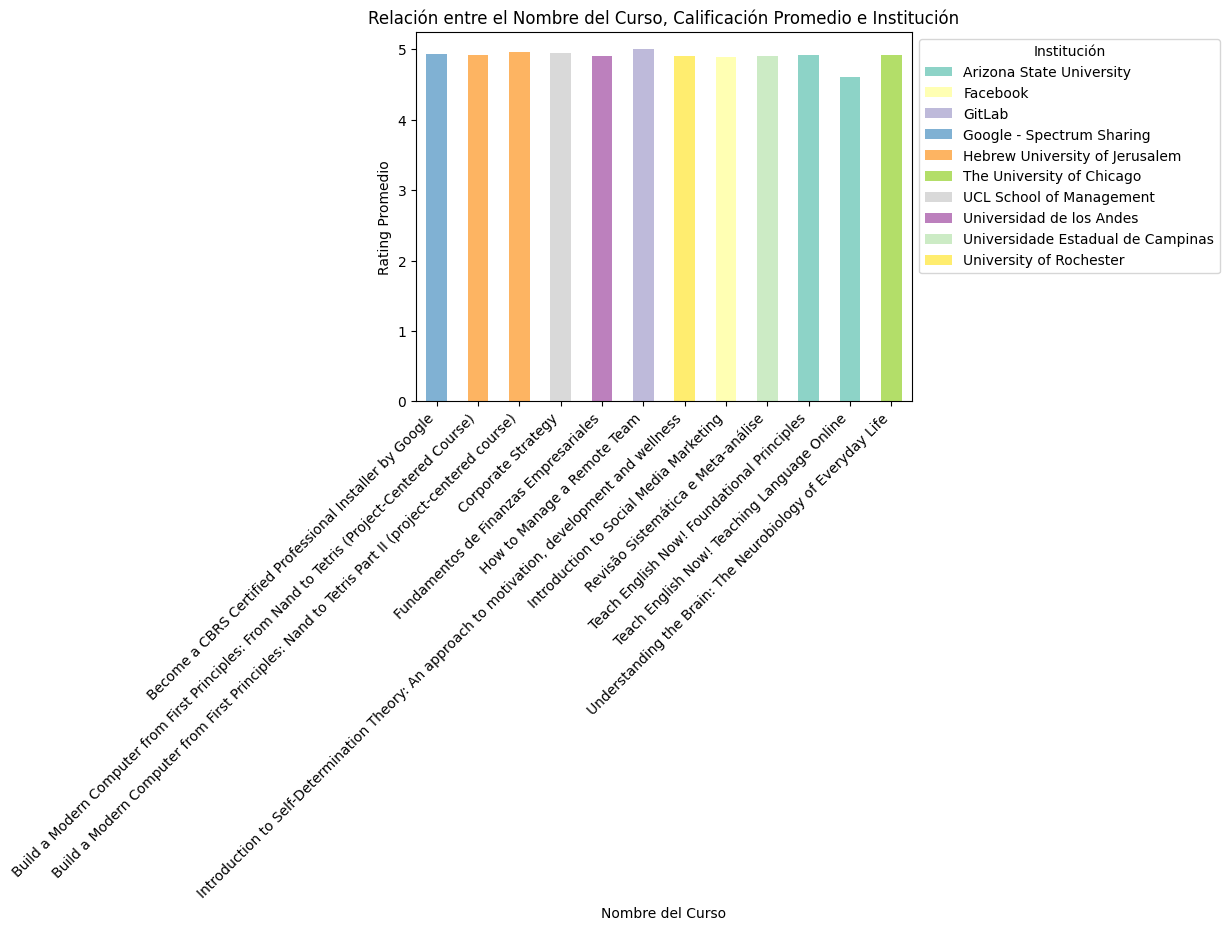

In [29]:
# Ejemplo 6 (modificado): Relación entre el Nombre del Curso, Calificación Promedio e Institución
top_10_institutions = coursera_merged.groupby('institution')['rating'].mean().nlargest(10).index
top_10_institutions_df = coursera_merged[coursera_merged['institution'].isin(top_10_institutions)]
course_rating_by_institution = top_10_institutions_df.groupby(['name', 'institution'])['rating'].mean().unstack()

plt.figure(figsize=(12, 6))
course_rating_by_institution.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Nombre del Curso')
plt.ylabel('Rating Promedio')
plt.title('Relación entre el Nombre del Curso, Calificación Promedio e Institución')
plt.legend(title='Institución', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
unique_counts = coursera_merged.nunique()
print(unique_counts)


name               603
institution        132
course_url         604
course_id          604
reviews         458277
reviewers       287808
date_reviews      1892
rating               5
dtype: int64


### KPI: Tasa de Aprobación Promedio de los Cursos en Coursera

KPI de tasa de aprobación promedio de los cursos en Coursera:

Objetivo: Mejorar la tasa de aprobación promedio de los cursos en Coursera en un 5% en el próximo trimestre.

Indicador numérico: Porcentaje de tasa de aprobación promedio de los cursos.

Plazo: Medir el progreso en el transcurso del próximo trimestre.

Meta: Alcanzar una tasa de aprobación promedio de cursos del 100% en el próximo trimestre.

Monitoreo y medición: Recopilar y analizar regularmente los datos de la tasa de aprobación promedio de los cursos, compararlos con la meta establecida y tomar medidas para mejorar la calidad de los cursos según los resultados obtenidos.

In [42]:
# Convertir la columna 'reviews' a numérica y eliminar las filas con valores nulos
coursera_merged['reviews'] = pd.to_numeric(coursera_merged['reviews'], errors='coerce')
coursera_merged = coursera_merged.dropna(subset=['reviews'])

# Calcular la tasa de aprobación promedio
approval_rate = (coursera_merged['rating'] >= 4).mean() * 100

# Imprimir el resultado
print(f"Tasa de aprobación promedio de los cursos en Coursera: {approval_rate:.2f}%")


Tasa de aprobación promedio de los cursos en Coursera: 96.70%


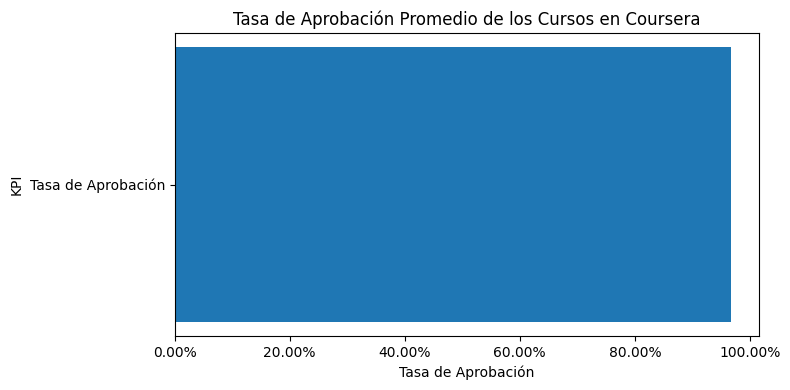

In [43]:
# Calcular la tasa de aprobación promedio
approval_rate = (coursera_merged['rating'] >= 4).mean() * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(['Tasa de Aprobación'], [approval_rate])

# Configurar el eje x con la función ticker
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=2))

# Etiquetas y título del gráfico
ax.set_xlabel('Tasa de Aprobación')
ax.set_ylabel('KPI')
ax.set_title('Tasa de Aprobación Promedio de los Cursos en Coursera')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [47]:

coursera_merged.to_csv('coursera', index=False)
